In [83]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch

In [2]:
# load json data
with open(r'C:\Users\RidhoBeteer\elclasico.json', encoding="utf8") as f:
    d = json.load(f)

In [3]:
# extract data from dict (credit to: https://github.com/karlosos/)
def extract_data_from_dict(data):
    match_id = data['matchId']
    event_types = data['matchCentreEventTypeJson']
    formation_mappings = data['formationIdNameMappings']
    events_dict = data['matchCentreData']['events']
    teams_dict = {
        data['matchCentreData']['home']['teamId']:data['matchCentreData']['home']['name'],
        data['matchCentreData']['away']['teamId']:data['matchCentreData']['away']['name']
    }
    players_dict = data['matchCentreData']['playerIdNameDictionary']
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df['teamId'] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df['teamId'] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df], ignore_index=True)

    return match_id, event_types, formation_mappings, events_dict, teams_dict, players_df

In [4]:
def get_match_events_list(events):
    event_list = []
    for event in events:
        event_list.append(event['type']['displayName'])

    return event_list

In [5]:
def get_events_df(events):
    df_events = pd.DataFrame(events)
    df_events['event_type'] = df_events.apply(lambda row: row['type']['displayName'], axis=1)
    df_events['outcome_type'] = df_events.apply(lambda row: row['outcomeType']['displayName'], axis=1)
    
    return df_events

In [6]:
match_id, event_types, formation_mappings, events_dict, teams_dict, players_df = extract_data_from_dict(d)

In [7]:
df_events = get_events_df(events_dict)
df_events = df_events.dropna(subset=["playerId"])
df_events['player_name'] = df_events['playerId'].map(players_df.set_index('playerId')['name'])
# df_events['matchday'] = 11
# df_events['competition'] = 'LaLiga'
df_events['opposing_team'] = df_events.apply(lambda row: 'Real Madrid' if row['teamId'] == 65 else 'Barcelona', axis=1)
df_events['isHome'] = df_events.apply(lambda row: True if row['teamId'] == 52 else False, axis=1)


In [8]:
event_types = {v: k for k, v in event_types.items()}
df_events['satisfiedEventsTypes'] = df_events['satisfiedEventsTypes'].apply(lambda x: [event_types[i] for i in x])

In [38]:
df_events

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,goalMouthZ,goalMouthY,isShot,cardType,isGoal,event_type,outcome_type,player_name,opposing_team,isHome
2,2.739510e+09,3,0,0.0,52,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Kylian Mbappé,Barcelona,True
3,2.739510e+09,4,0,3.0,52,28.0,52.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Antonio Rüdiger,Barcelona,True
4,2.739510e+09,3,0,8.0,65,23.0,75.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}",...,NaN,NaN,NaN,NaN,NaN,Aerial,Successful,Alejandro Balde,Real Madrid,False
5,2.739510e+09,5,0,8.0,52,77.0,24.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}",...,NaN,NaN,NaN,NaN,NaN,Aerial,Unsuccessful,Lucas Vázquez,Barcelona,True
6,2.739510e+09,4,0,9.0,65,20.8,76.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2.739585e+09,819,91,42.0,65,63.9,16.7,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Jules Koundé,Real Madrid,False
1357,2.739585e+09,820,91,50.0,65,94.2,15.6,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 50, 'displayName': 'Dispossessed'}",...,NaN,NaN,NaN,NaN,NaN,Dispossessed,Successful,Lamine Yamal,Real Madrid,False
1358,2.739585e+09,692,91,50.0,52,5.8,84.4,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 7, 'displayName': 'Tackle'}",...,NaN,NaN,NaN,NaN,NaN,Tackle,Successful,Fran García,Barcelona,True
1359,2.739585e+09,693,91,52.0,52,7.1,96.2,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 49, 'displayName': 'BallRecovery'}",...,NaN,NaN,NaN,NaN,NaN,BallRecovery,Successful,Jude Bellingham,Barcelona,True


In [10]:
df_events.event_type.unique()

array(['Pass', 'Aerial', 'BallRecovery', 'BlockedPass', 'BallTouch',
       'KeeperPickup', 'OffsideGiven', 'OffsidePass', 'OffsideProvoked',
       'Foul', 'CornerAwarded', 'Clearance', 'Dispossessed', 'Tackle',
       'Punch', 'Interception', 'TakeOn', 'SavedShot', 'Save',
       'MissedShots', 'Challenge', 'KeeperSweeper', 'Smother', 'Card',
       'SubstitutionOff', 'SubstitutionOn', 'Goal', 'ShotOnPost'],
      dtype=object)

In [13]:
def filter_dataframe(df, c, v):
    df_filter = df.loc[df[c] == v]
    return df_filter

In [39]:
df_passes= filter_dataframe(df_events, 'event_type', 'Pass')
df_passes= filter_dataframe(df_passes, 'teamId', 65)
df_passes.sort_values(by=['player_name'])

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,goalMouthZ,goalMouthY,isShot,cardType,isGoal,event_type,outcome_type,player_name,opposing_team,isHome
6,2.739510e+09,4,0,9.0,65,20.8,76.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
728,2.739557e+09,458,46,23.0,65,60.0,96.5,49,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
123,2.739515e+09,75,7,9.0,65,38.5,91.1,7,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
707,2.739556e+09,439,45,20.0,65,68.2,95.7,48,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
627,2.739540e+09,386,42,38.0,65,78.4,86.3,42,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2.739515e+09,74,7,6.0,65,45.3,98.4,7,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False
206,2.739518e+09,121,12,21.0,65,47.0,47.8,12,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False
1049,2.739573e+09,649,69,49.0,65,72.9,48.8,72,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Robert Lewandowski,Real Madrid,False
613,2.739539e+09,373,42,4.0,65,44.0,73.0,42,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False


In [58]:
df_recovery = filter_dataframe(df_events, 'event_type', 'BallRecovery')
df_recovery = filter_dataframe(df_recovery, 'teamId', 65)
df_recovery = df_recovery.sort_values(by=['player_name'])

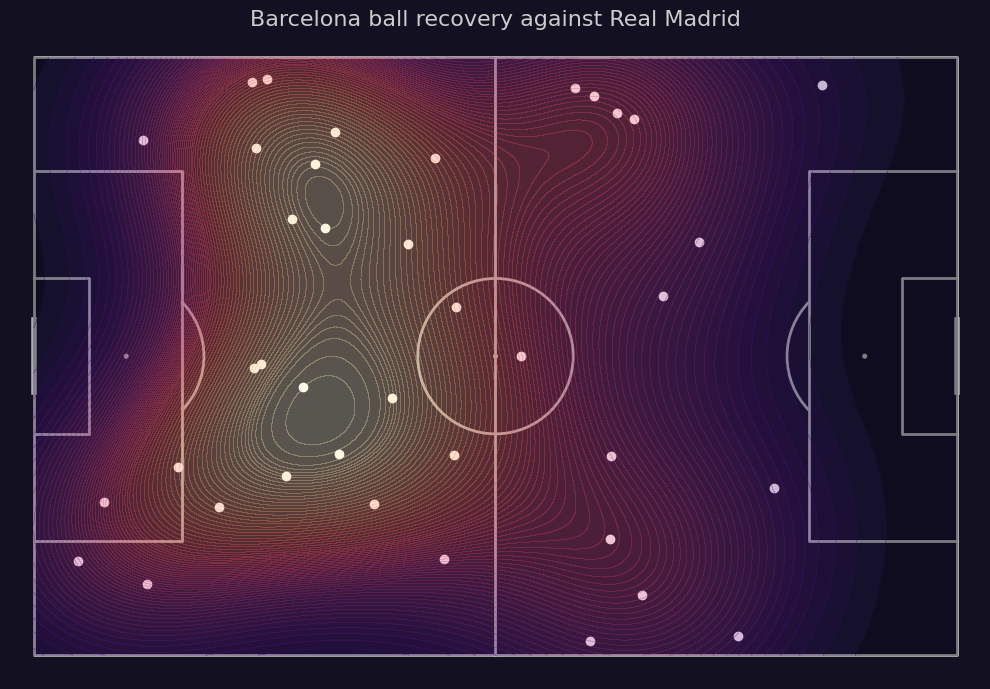

In [94]:
pitch = Pitch(pitch_type='wyscout', pitch_color='#131022')
fig, ax = pitch.draw(figsize=(11, 7), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#131022')

pitch.scatter(df_recovery.x, df_recovery.y, c='#fff', ax=ax)
pitch.kdeplot(df_recovery.x, df_recovery.y, ax=ax,
              fill=True, levels=75, thresh=0,
              cut=4, cmap='magma', alpha=0.3)
ax_title = ax.set_title(f'Barcelona ball recovery against Real Madrid', fontsize=16, color='#ccc')
plt.gca().invert_yaxis()